# Project 1

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
# Importing standard libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample

In [6]:
# Importing project-specific files
from DataFunctions import FrankeFunction, SimpleFunction
from LinearRegression import OLS_matrix_inversion, ridge_regression, lasso_regression
from GradientDescent import GradientDescent, StochasticGradientDescent, bias_variance_tradeoff
from Statistics import MSE, R2

In [7]:
# Defining first data set
step_size = 0.05
arr = np.arange(0, 1, step_size)

Mat = np.meshgrid(arr, arr)
data = FrankeFunction(*Mat, noise=0)

## Part g): Write your Logistic Regression code

In [ ]:
# importing libraries and functions
import pandas as pd
from Statistics import sigmoid
#from MLFunctions import LogisticCostFunction

In [ ]:

# importing dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_pd = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [ ]:
# defining dataset
dims = 500
X = cancer.data[0:dims, 0]
data = cancer.target[0:dims]
X = np.c_[np.ones(dims), X]
ndata, ndims = np.shape(X)

In [ ]:
X

array([[ 1.   , 17.99 ],
       [ 1.   , 20.57 ],
       [ 1.   , 19.69 ],
       [ 1.   , 11.42 ],
       [ 1.   , 20.29 ],
       [ 1.   , 12.45 ],
       [ 1.   , 18.25 ],
       [ 1.   , 13.71 ],
       [ 1.   , 13.   ],
       [ 1.   , 12.46 ],
       [ 1.   , 16.02 ],
       [ 1.   , 15.78 ],
       [ 1.   , 19.17 ],
       [ 1.   , 15.85 ],
       [ 1.   , 13.73 ],
       [ 1.   , 14.54 ],
       [ 1.   , 14.68 ],
       [ 1.   , 16.13 ],
       [ 1.   , 19.81 ],
       [ 1.   , 13.54 ],
       [ 1.   , 13.08 ],
       [ 1.   ,  9.504],
       [ 1.   , 15.34 ],
       [ 1.   , 21.16 ],
       [ 1.   , 16.65 ],
       [ 1.   , 17.14 ],
       [ 1.   , 14.58 ],
       [ 1.   , 18.61 ],
       [ 1.   , 15.3  ],
       [ 1.   , 17.57 ],
       [ 1.   , 18.63 ],
       [ 1.   , 11.84 ],
       [ 1.   , 17.02 ],
       [ 1.   , 19.27 ],
       [ 1.   , 16.13 ],
       [ 1.   , 16.74 ],
       [ 1.   , 14.25 ],
       [ 1.   , 13.03 ],
       [ 1.   , 14.99 ],
       [ 1.   , 13.48 ],


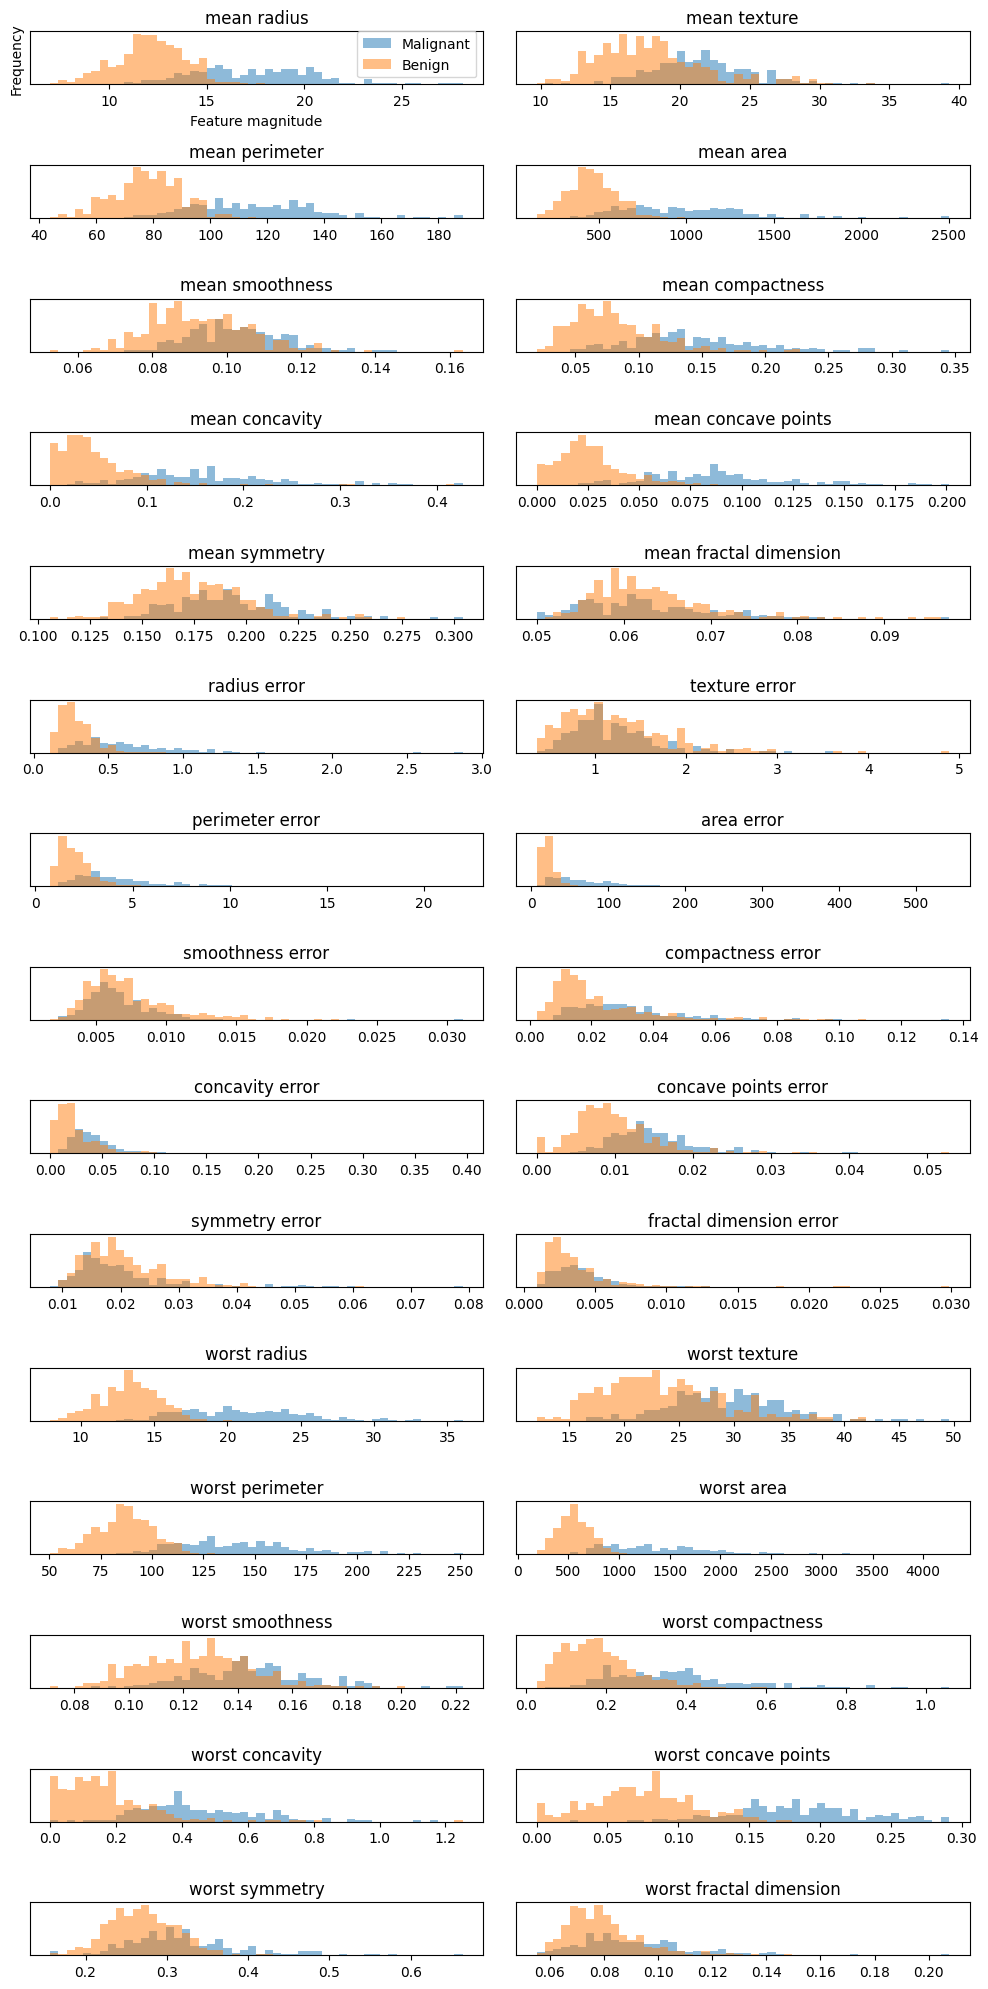

In [ ]:
# To be deleted
fig, axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i], bins =50)
    ax[i].hist(malignant[:,i], bins = bins, alpha = 0.5)
    ax[i].hist(benign[:,i], bins = bins, alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["Malignant", "Benign"], loc ="best")
fig.tight_layout()
plt.show()


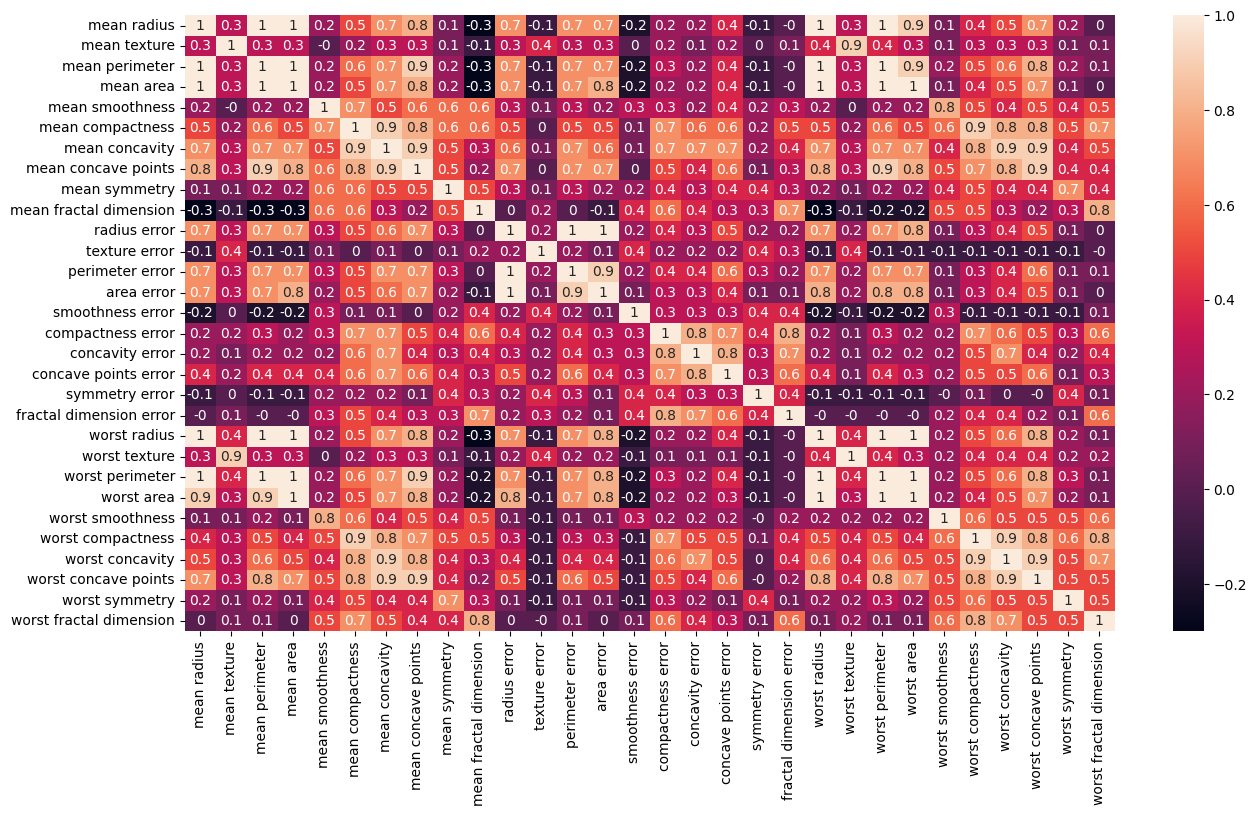

In [ ]:
# to be deleted

import seaborn as sns
correlation_matrix = cancer_pd.corr().round(1)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.figure(figsize=(15,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [ ]:
# split data in test and train
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, data, test_size=test_size)

# SGD with learning rate as hyper-parameter
beta_temp, cost_temp = StochasticGradientDescent(X_train, y_train, batch_size=4)


In [ ]:
def LogisticProbability(X, beta):
    return sigmoid(X @ beta)

def LogisticCostFunction(X, data, beta):
    y_pred = beta @ X
    return -np.sum(data * y_pred - np.log(1 + np.exp(y_pred)), axis=0)

In [ ]:
ndata, ndims = np.shape(X)

batch_size = 10
assert(ndata % batch_size == 0)
nbatches = int(ndata / batch_size)

# splitting up data in minibatches
X_batch = X.reshape(nbatches, batch_size, ndims)
data_batch = data.reshape(nbatches, batch_size)

# initial guesses for beta and the gradient
beta = np.random.rand(ndims) / dims
p = LogisticProbability(X, beta)
grad = (data - p) * p * (1 - p) @ X

(array([0.00121931, 0.00101143]),
 array([0.50485356, 0.50550586, 0.50528337, 0.5031924 , 0.50543507,
        0.50345284, 0.5049193 , 0.50377142, 0.5035919 , 0.50345536,
        0.50435548, 0.5042948 , 0.5051519 , 0.5043125 , 0.50377647,
        0.50398128, 0.50401667, 0.50438329, 0.50531371, 0.50372843,
        0.50361213, 0.50270795, 0.50418355, 0.50565503, 0.50451476,
        0.50463865, 0.50399139, 0.50501032, 0.50417343, 0.50474737,
        0.50501537, 0.5032986 , 0.50460831, 0.50517719, 0.50438329,
        0.50453752, 0.50390795, 0.50359948, 0.50409505, 0.50371326,
        0.50370315, 0.50307357, 0.50512662, 0.5036627 , 0.50363488,
        0.50502043, 0.50237722, 0.50363488, 0.5033517 , 0.50371579,
        0.50327837, 0.50375372, 0.50332388, 0.50491171, 0.50412287,
        0.50321769, 0.50516202, 0.50402426, 0.50360454, 0.50248392,
        0.50287635, 0.50247887, 0.50390795, 0.50262426, 0.50351099,
        0.50404196, 0.50269809, 0.50316459, 0.50258784, 0.50353627,
        0.5050

In [ ]:
nepochs = 50
momentum = 0

In [ ]:
# compute learning rate
H = (2 / ndata) *  X.T @ X
eigVal, _ = np.linalg.eig(H)
learning_rate = 1 / np.max(eigVal)

for epoch in range(nepochs):
    for batch in range(nbatches):
        # pick random minibatch
        idx = np.random.randint(nbatches)
        X_, data_ = X_batch[idx], data_batch[idx]
        p_ = LogisticProbability(X_, beta)

        # computing gradient over minibatch
        grad_prev = grad
        # grad = (2.0 / batch_size) * X_.T @ (X_ @ beta - data_)
        grad = (data_ - p_) * p_ * (1 - p_) @ X_
        
        # update beta
        beta = beta - momentum * grad_prev - learning_rate * grad

# compute cost
#cost = norm2(X @ beta - data) / ndata

In [ ]:
# np.shape(learning_rate * grad)
#np.shape(momentum * grad_prev

array([0.99937532, 0.99919832, 0.99444378, 0.99917629, 0.98876474,
       0.99859878, 0.99935815, 0.99836033, 0.9994083 , 0.99851271,
       0.99813266, 0.99918517, 0.9910439 , 0.99612262, 0.99094704,
       0.99335767, 0.9943256 , 0.99790771, 0.99282162, 0.9990567 ,
       0.99225518, 0.99878295, 0.99937192, 0.99909675, 0.99806049,
       0.99930375, 0.99856029, 0.9988155 , 0.99965604, 0.99965228,
       0.99927681, 0.99934407, 0.9986941 , 0.99523107, 0.99821186,
       0.97850081, 0.9986941 , 0.99545492, 0.99673875, 0.99825019,
       0.9988155 , 0.99794143, 0.99520524, 0.99897678, 0.99957729,
       0.99677384, 0.99154944, 0.99850462, 0.99250952, 0.99801801,
       0.99962889, 0.99931499, 0.999472  , 0.99973201, 0.99870116,
       0.99980752, 0.99831531, 0.99803937, 0.99787344, 0.99510318,
       0.99803937, 0.99911613, 0.99716672, 0.99848012, 0.99970928,
       0.99961661, 0.99943954, 0.99916278, 0.98890257, 0.99508463,
       0.99771834, 0.99922818, 0.99874272, 0.99989575, 0.99860

In [ ]:
# output probability of belongnig to specific category
# correlation matrix?
# principal component?